In [35]:
import pandas as pd
import numpy as np
import covsirphy as cs
from pprint import pprint

### Cases Data

In [8]:
data_loader = cs.DataLoader("input")
jhu_data_new = data_loader.jhu()

Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
	Please set verbose=2 to see the detailed citation list.
Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


In [10]:
data_loader = cs.DataLoader("test")
jhu_data = data_loader.jhu(basename="test.csv",local_file="test.csv")

In [3]:
jhu_data.subset("USA")

,Date,Confirmed,Infected,Fatal,Recovered
0,2020-02-09,12,9,0,3
1,2020-02-10,12,9,0,3
2,2020-02-11,13,10,0,3
3,2020-02-12,13,10,0,3
4,2020-02-13,14,11,0,3
...,...,...,...,...,...
403,2021-03-18,29670983,22832433,540468,6298082
404,2021-03-19,29732612,22892916,541614,6298082
405,2021-03-20,29787986,22947548,542356,6298082
406,2021-03-21,29821754,22980877,542795,6298082


In [ ]:
df, complement = jhu_data.records("USA")
display(df.tail())
# Show details of complement
print(complement)

In [ ]:
df_2021 = df.iloc[327:, ]

In [ ]:
df_2021

In [ ]:
#df = jhu_data.cleaned()
jhu_first_date, jhu_last_date = df["Date"].min(), df["Date"].max()

### Population Data

In [11]:
population_data = data_loader.population()
population_data.value("USA", province=None)

326687501

In [ ]:
data_cols = ["Infected", "Fatal", "Recovered"]
rate_cols = ["Fatal per Confirmed", "Recovered per Confirmed", "Fatal per (Fatal or Recovered)"]

In [ ]:
total_df = jhu_data.total()
total_df = total_df.loc[total_df.index <= jhu_last_date, :]
total_df.tail()

In [ ]:
population_data = loader.population()
scenario = sir.Scenario(jhu_data, population_data, country="USA")
_ = scenario.records(variables="CFR")

In [ ]:
scenario.trend()

### Vaccine

In [ ]:
URL = "https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/us_state_vaccinations.csv"

In [ ]:
vaccine_data = pd.read_csv("us_state_vaccinations.csv")

In [ ]:
vaccine_data

### SIR-F

In [ ]:
example_data = cs.ExampleData(tau=1440, start_date="01Jan2021")
# No records has been registered
example_data.cleaned()

In [ ]:
cs.SIRF.EXAMPLE["population"]= 326687501
cs.SIRF.EXAMPLE["y0_dict"]["Fatal"] = 354232
cs.SIRF.EXAMPLE["y0_dict"]["Infected"] = 11581576
cs.SIRF.EXAMPLE["y0_dict"]["Susceptible"] = 312434510
cs.SIRF.EXAMPLE["y0_dict"]["Recovered"] = 8317183

In [ ]:
# Model name
print(cs.SIRF.NAME)
# Example parameter values
pprint(cs.SIRF.EXAMPLE, compact=True)

In [ ]:
model = cs.SIRF
area = {"country": "USA", "province": model.NAME}
# Add records with SIR model
example_data.add(model, **area)
# Records with model variables
df = example_data.specialized(model, **area)

In [ ]:
df.head()

In [ ]:
cs.line_plot(
    df.set_index("Date"),
    title=f"Example data of {model.NAME} model",
    y_integer=True
)

### Scenario

In [5]:
population_data = data_loader.population()
population_data.value("United States", province=None)

326687501

In [ ]:
preset_dict = cs.SIRF.EXAMPLE["param_dict"]
preset_dict

In [ ]:
model = cs.SIRF
area = {"country": "USA", "province": model.NAME}
test_data = cs.ExampleData(tau=1440, start_date="01Jan2021")
# No records has been registered
test_data.cleaned()

In [ ]:
pprint(cs.SIRF.EXAMPLE, compact=True)

In [ ]:
_dict = {'param_dict': {'kappa': 0.005, 'rho': 0.2, 'sigma': 0.075, 'theta': 0.002},
 'population': 326687501,
 'step_n': 180,
 'y0_dict': {'Fatal': 354232,
             'Infected': 11581576,
             'Recovered': 8317183,
             'Susceptible': 312434510}}

In [ ]:
test_data.add(jhu_data.records("USA"), step_n=110, **area)
# Register population value
population_data.update(value=population_data.value("United States", province=None), **area)
population_data.value(**area)

df = test_data.specialized(model, **area)
df

In [ ]:
snl = cs.Scenario(tau=1440, **area)
snl.register(test_data, population_data)

In [ ]:
record_df = snl.records()
display(record_df.head())
display(record_df.tail())

In [ ]:
# Set 0th phase from 02Jan2020 to 31Jan2020 with preset parameter values
snl.clear(include_past=True)
snl.add(end_date="21Apr2021", model=cs.SIRF, **preset_dict)
# Show summary
snl.summary()

In [ ]:
rho_vac = snl.get("rho", phase="0th") * 0.8
kappa_vac = snl.get("kappa", phase="0th") * 0.6
sigma_vac = snl.get("sigma", phase="0th") * 1.2
snl.add(end_date="31Dec2021",  rho=rho_vac, kappa=kappa_vac, sigma=sigma_vac)

In [ ]:
_ = snl.history(target="Infected")

In [ ]:
snl.summary()

### TEST

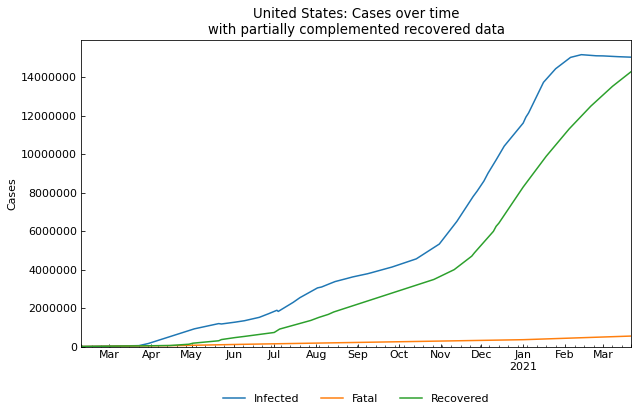

,Date,Infected,Fatal,Recovered
403,2021-03-18,15044130,540468,14086385
404,2021-03-19,15051341,541614,14139657
405,2021-03-20,15053300,542356,14192330
406,2021-03-21,15034554,542795,14244405
407,2021-03-22,15033952,543513,14295882


In [12]:
us_scenario = cs.Scenario(country="United States")
us_scenario.register(jhu_data, population_data)
us_scenario.records().tail()

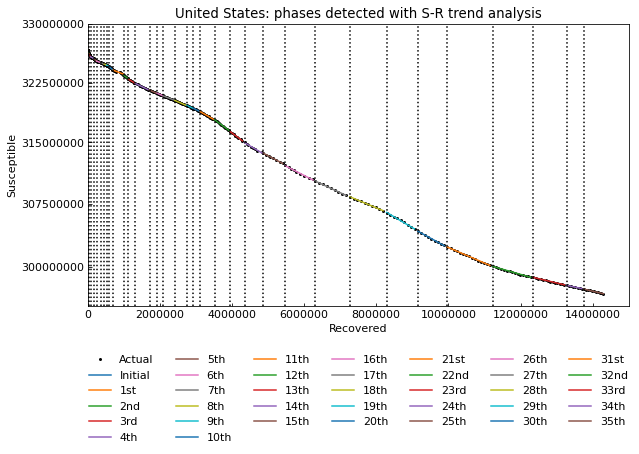

In [13]:
_ = us_scenario.trend()

In [14]:
us_scenario.summary()

,Type,Start,End,Population
0th,Past,09Feb2020,16Mar2020,326687501
1st,Past,17Mar2020,30Mar2020,326687501
2nd,Past,31Mar2020,10Apr2020,326687501
3rd,Past,11Apr2020,22Apr2020,326687501
4th,Past,23Apr2020,03May2020,326687501
5th,Past,04May2020,14May2020,326687501
6th,Past,15May2020,22May2020,326687501
7th,Past,23May2020,31May2020,326687501
8th,Past,01Jun2020,08Jun2020,326687501
9th,Past,09Jun2020,16Jun2020,326687501


In [15]:
us_scenario.estimate(cs.SIRF, timeout=120)


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...
	35th phase (12Mar2021 - 22Mar2021): finished  169 trials in 0 min  5 sec
Completed optimization. Total: 2 min 12 sec


In [16]:
us_scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,09Feb2020,16Mar2020,326687501,SIR-F,20.91,0.000093,3.097596e-05,0.000943,0.000014,10,0.000,224,491,7,0.798550,351,0 min 25 sec
1st,Past,17Mar2020,30Mar2020,326687501,SIR-F,42.06,0.003022,3.155022e-05,0.002037,0.000017,10,0.003,220,414,3,0.244604,454,0 min 30 sec
2nd,Past,31Mar2020,10Apr2020,326687501,SIR-F,8.63,0.000717,4.277044e-05,0.000806,0.000051,10,0.001,162,137,8,0.061342,565,0 min 40 sec
3rd,Past,11Apr2020,22Apr2020,326687501,SIR-F,4.09,0.000231,2.650148e-05,0.000338,0.000056,10,0.000,262,123,20,0.035246,723,0 min 40 sec
4th,Past,23Apr2020,03May2020,326687501,SIR-F,2.52,0.000703,1.542423e-05,0.000239,0.000080,10,0.001,450,87,28,0.037127,759,0 min 55 sec
5th,Past,04May2020,14May2020,326687501,SIR-F,3.20,0.002534,1.144051e-05,0.000168,0.000041,10,0.003,607,170,41,0.019415,156,0 min 10 sec
6th,Past,15May2020,22May2020,326687501,SIR-F,2.05,0.003559,6.413542e-06,0.000144,0.000064,10,0.004,1082,109,48,0.021481,360,0 min 25 sec
7th,Past,23May2020,31May2020,326687501,SIR-F,2.18,0.000468,5.094119e-06,0.000119,0.000049,10,0.000,1363,140,58,0.008624,1810,1 min 36 sec
8th,Past,01Jun2020,08Jun2020,326687501,SIR-F,2.22,0.001819,4.303535e-06,0.000111,0.000046,10,0.002,1613,152,62,0.003859,71,0 min 5 sec
9th,Past,09Jun2020,16Jun2020,326687501,SIR-F,2.50,0.000556,4.014641e-06,0.000108,0.000039,10,0.001,1729,177,64,0.003906,84,0 min 5 sec


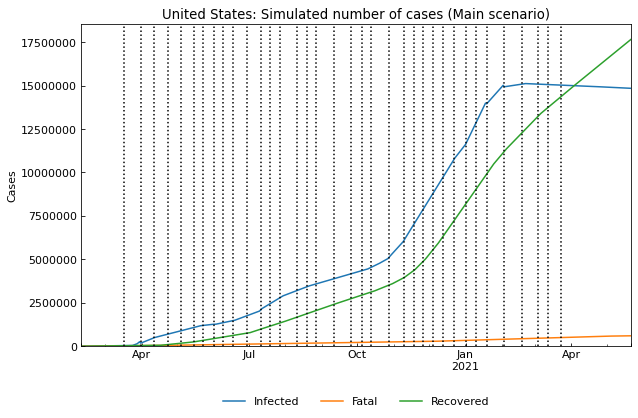

,Date,Confirmed,Fatal,Infected,Recovered
462,2021-05-16 00:00:00,32807610,597058,14860886,17349666
463,2021-05-17 00:00:00,32860125,598020,14857512,17404593
464,2021-05-18 00:00:00,32912619,598982,14854130,17459507
465,2021-05-19 00:00:00,32965091,599943,14850739,17514409
466,2021-05-20 00:00:00,33017541,600904,14847339,17569298
467,2021-05-21 00:00:00,33069970,601865,14843931,17624174
468,2021-05-22 00:00:00,33122378,602826,14840514,17679038


In [17]:
us_scenario.clear()
us_scenario.add(days=60)
us_scenario.simulate().tail(28).style.background_gradient(axis=0)

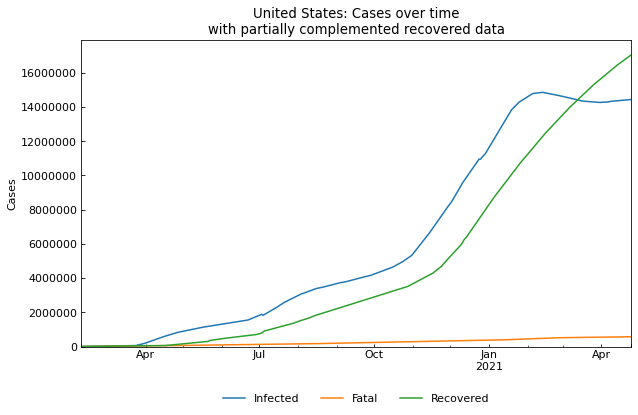

,Date,Infected,Fatal,Recovered
437,2021-04-21,14438403,569491,16854200
438,2021-04-22,14451901,570434,16907016
439,2021-04-23,14461167,571197,16959386
440,2021-04-24,14461883,571921,17011309
441,2021-04-25,14442192,572200,17062786


In [18]:
us_scenario_new = cs.Scenario(country="United States")
us_scenario_new.register(jhu_data_new, population_data)
us_scenario_new.records().tail()

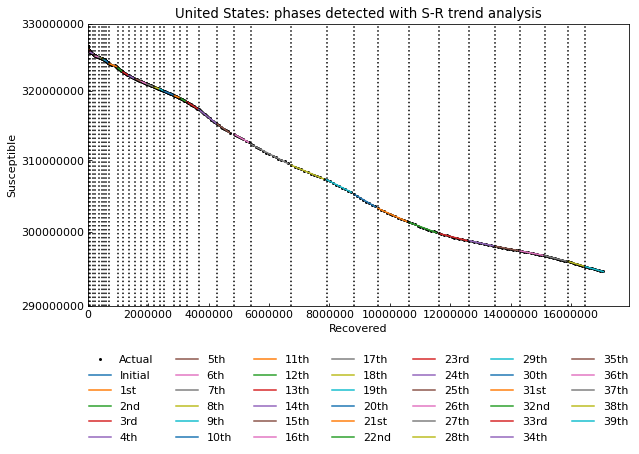

In [19]:
_ = us_scenario_new.trend()

In [20]:
us_scenario_new.estimate(cs.SIRF, timeout=120)


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...
	39th phase (14Apr2021 - 25Apr2021): finished  178 trials in 0 min  5 sec
Completed optimization. Total: 2 min 42 sec


In [21]:
us_scenario_new.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],alpha1 [-],1/gamma [day],1/beta [day],RMSLE,Trials,Runtime
0th,Past,09Feb2020,16Mar2020,326687501,SIR-F,20.91,0.000093,1.548798e-05,0.000471,0.000007,5,224,0.000,491,7,0.798572,377,0 min 25 sec
1st,Past,17Mar2020,30Mar2020,326687501,SIR-F,42.05,0.003022,1.578128e-05,0.001018,0.000008,5,220,0.003,414,3,0.244587,512,0 min 35 sec
2nd,Past,31Mar2020,10Apr2020,326687501,SIR-F,8.62,0.000740,2.127978e-05,0.000403,0.000025,5,163,0.001,136,8,0.061326,523,0 min 35 sec
3rd,Past,11Apr2020,22Apr2020,326687501,SIR-F,4.09,0.000231,1.325074e-05,0.000169,0.000028,5,262,0.000,123,20,0.035246,579,0 min 40 sec
4th,Past,23Apr2020,03May2020,326687501,SIR-F,2.52,0.000703,7.712115e-06,0.000120,0.000040,5,450,0.001,87,28,0.037127,770,0 min 55 sec
5th,Past,04May2020,14May2020,326687501,SIR-F,3.20,0.002534,5.720253e-06,0.000084,0.000020,5,607,0.003,170,41,0.019415,167,0 min 10 sec
6th,Past,15May2020,22May2020,326687501,SIR-F,1.83,0.000117,3.813866e-06,0.000066,0.000032,5,910,0.000,106,52,0.021118,903,1 min 6 sec
7th,Past,23May2020,31May2020,326687501,SIR-F,2.18,0.000468,2.547060e-06,0.000059,0.000025,5,1363,0.000,140,58,0.008624,1833,1 min 25 sec
8th,Past,01Jun2020,08Jun2020,326687501,SIR-F,2.22,0.001819,2.151768e-06,0.000055,0.000023,5,1613,0.002,152,62,0.003859,89,0 min 5 sec
9th,Past,09Jun2020,16Jun2020,326687501,SIR-F,2.50,0.000556,2.007320e-06,0.000054,0.000020,5,1729,0.001,177,64,0.003906,85,0 min 5 sec


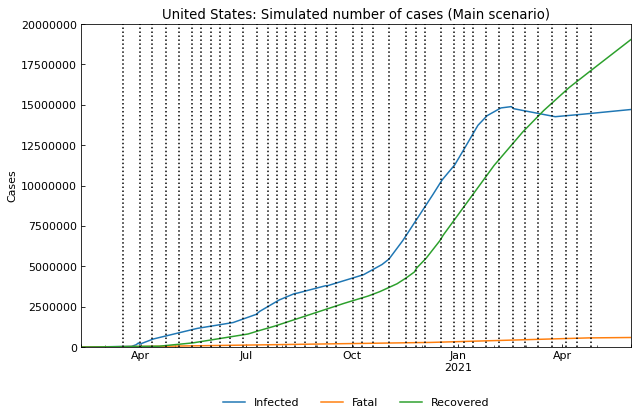

,Date,Confirmed,Fatal,Infected,Recovered
450,2021-05-04 00:00:00,32674949,577987,14527901,17569061
451,2021-05-05 00:00:00,32737812,578660,14534954,17624198
452,2021-05-06 00:00:00,32800693,579333,14541997,17679363
453,2021-05-07 00:00:00,32863588,580006,14549029,17734553
454,2021-05-08 00:00:00,32926503,580680,14556052,17789771
455,2021-05-09 00:00:00,32989434,581354,14563065,17845015
456,2021-05-10 00:00:00,33052381,582028,14570068,17900285
457,2021-05-11 00:00:00,33115345,582702,14577060,17955583
458,2021-05-12 00:00:00,33178326,583377,14584043,18010906
459,2021-05-13 00:00:00,33241323,584052,14591015,18066256


In [34]:
us_scenario_new.clear()
us_scenario_new.add(days=35)
us_scenario_new.simulate().tail(28).style.background_gradient(axis=0)

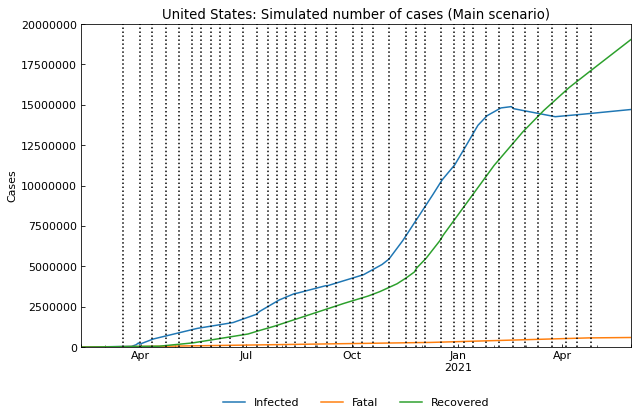

In [26]:
test = us_scenario_new.simulate()

In [27]:
test

,Date,Confirmed,Fatal,Infected,Recovered
0,2020-02-09,12,0,9,3
1,2020-02-10,13,0,10,3
2,2020-02-11,15,0,12,3
3,2020-02-12,16,0,13,3
4,2020-02-13,18,0,15,3
...,...,...,...,...,...
473,2021-05-27,34125001,593531,14687553,18843917
474,2021-05-28,34188242,594211,14694371,18899660
475,2021-05-29,34251496,594890,14701178,18955428
476,2021-05-30,34314767,595570,14707975,19011222


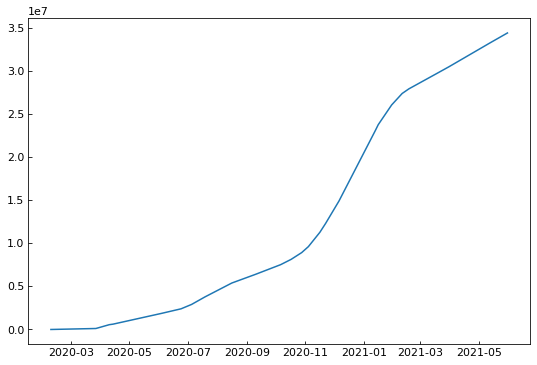

In [32]:
import matplotlib.pyplot as plt
plt.plot(test["Date"], test["Confirmed"])